<center>
<h1> ...CASE STUDY... 
    <h2> NETWORK INTRUSION DETECTION
</center>
 

### Import some important Packages

In [1]:
## importing some important library..
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pylab

# For pandas profiling 
import pandas_profiling

# For VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

### Load Train and Test Data

In [69]:
#load train data
train = pd.read_csv("Train.Txt",header = None)

In [70]:
train.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
                    "wrong_fragment","urgent","hot","num_failed_logins","logged_in",
                    "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
                    "num_shells","num_access_files","num_outbound_cmds","is_host_login",
                    "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
                    "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate",
                     "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
                    "dst_host_diff_srv_rate","dst_host_same_src_port_rate",
                    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
                    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [19]:
# Load test data
test = pd.read_csv("Test.Txt",header = None)

In [20]:
test.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
                "wrong_fragment","urgent","hot","num_failed_logins","logged_in",
                "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
                "num_shells","num_access_files","num_outbound_cmds","is_host_login",
                "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
                "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate",
                "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
                "dst_host_diff_srv_rate","dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
                "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

### Exploratory Data Analysis

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
duration                       22544 non-null int64
protocol_type                  22544 non-null object
service                        22544 non-null object
flag                           22544 non-null object
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_root                       22544 non-null int64
num_file_creations             22544 non-null int64
num_

In [71]:
#Labelling y column to 1,0 values which is orginally stored as normol and else
train['attack'] = np.where(train['attack'] == "normal",0,1)

In [26]:
#Labelling y column to 1,0 values which is orginally stored as normol and else
test['attack'] = np.where(test['attack'] == "normal",0,1)

In [27]:
train['attack'].value_counts()

0    67343
1    58630
Name: attack, dtype: int64

In [29]:
## Pandas Profiling
profile_report = pandas_profiling.ProfileReport(train)
profile_report.to_file(output_file = 'profilereport.html')

In [30]:
profile_report

In [35]:
# separate the categorical and continuous variable names
numeric_var_names = [key for key in dict(train.dtypes) 
                     if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]

In [40]:
print(numeric_var_names)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'last_flag']


In [41]:
print(cat_var_names)

['protocol_type', 'service', 'flag']


In [42]:
# get the dataframe of only continuous variables
train_num = train[numeric_var_names]

In [43]:
# get the dataframe of only categorical variables
train_cat = train[cat_var_names]

In [44]:
# separate the categorical and continuous variable names
num_var = [key for key in dict(test.dtypes) 
                     if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var = [key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]

In [46]:
# get the dataframe of only continuous variables
test_num = test[num_var]

In [47]:
# get the dataframe of only continuous variables
test_cat = test[cat_var]

### UDFs

In [48]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [49]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [50]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [51]:
train_num.apply(continuous_var_summary).T

N  NMISS           SUM          MEAN  \
duration                     125973.0    0.0  3.617247e+07    287.144650   
src_bytes                    125973.0    0.0  5.740179e+09  45566.743000   
dst_bytes                    125973.0    0.0  2.491634e+09  19779.114421   
land                         125973.0    0.0  2.500000e+01      0.000198   
wrong_fragment               125973.0    0.0  2.858000e+03      0.022687   
urgent                       125973.0    0.0  1.400000e+01      0.000111   
hot                          125973.0    0.0  2.575000e+04      0.204409   
num_failed_logins            125973.0    0.0  1.540000e+02      0.001222   
logged_in                    125973.0    0.0  4.985200e+04      0.395736   
num_compromised              125973.0    0.0  3.517800e+04      0.279250   
root_shell                   125973.0    0.0  1.690000e+02      0.001342   
su_attempted                 125973.0    0.0  1.390000e+02      0.001103   
num_root                     125973.0    0.0  3.806800e+04      0.302192   
num_file_creations           125973.0    0.0  1.596000e+03      0.012669   
num_shells                   125973.0    0.0  5.200000e+01      0.000413   
num_access_files             125973.0    0.0  5.160000e+02      0.004096   
num_outbound_cmds            125973.0    0.0  0.000000e+00      0.000000   
is_host_login                125973.0    0.0  1.000000e+00      0.000008   
is_guest_login               125973.0    0.0  1.187000e+03      0.009423   
count                        125973.0    0.0  1.059528e+07     84.107555   
srv_count                    125973.0    0.0  3.494225e+06     27.737888   
serror_rate                  125973.0    0.0  3.583737e+04      0.284485   
srv_serror_rate              125973.0    0.0  3.558553e+04      0.282485   
rerror_rate                  125973.0    0.0  1.511153e+04      0.119958   
srv_rerror_rate              125973.0    0.0  1.526582e+04      0.121183   
same_srv_rate                125973.0    0.0  8.325904e+04      0.660928   
diff_srv_rate                125973.0    0.0  7.942930e+03      0.063053   
srv_diff_host_rate           125973.0    0.0  1.225990e+04      0.097322   
dst_host_count               125973.0    0.0  2.294585e+07    182.148945   
dst_host_srv_count           125973.0    0.0  1.456916e+07    115.653005   
dst_host_same_srv_rate       125973.0    0.0  6.566238e+04      0.521242   
dst_host_diff_srv_rate       125973.0    0.0  1.044960e+04      0.082951   
dst_host_same_src_port_rate  125973.0    0.0  1.869173e+04      0.148379   
dst_host_srv_diff_host_rate  125973.0    0.0  4.099470e+03      0.032542   
dst_host_serror_rate         125973.0    0.0  3.583333e+04      0.284452   
dst_host_srv_serror_rate     125973.0    0.0  3.508153e+04      0.278485   
dst_host_rerror_rate         125973.0    0.0  1.496960e+04      0.118832   
dst_host_srv_rerror_rate     125973.0    0.0  1.514698e+04      0.120240   
attack                       125973.0    0.0  5.863000e+04      0.465417   
last_flag                    125973.0    0.0  2.456985e+06     19.504060   

                             MEDIAN           STD           VAR  MIN    P1  \
duration                       0.00  2.604515e+03  6.783500e+06  0.0   0.0   
src_bytes                     44.00  5.870331e+06  3.446079e+13  0.0   0.0   
dst_bytes                      0.00  4.021269e+06  1.617061e+13  0.0   0.0   
land                           0.00  1.408607e-02  1.984174e-04  0.0   0.0   
wrong_fragment                 0.00  2.535300e-01  6.427745e-02  0.0   0.0   
urgent                         0.00  1.436603e-02  2.063827e-04  0.0   0.0   
hot                            0.00  2.149968e+00  4.622364e+00  0.0   0.0   
num_failed_logins              0.00  4.523914e-02  2.046580e-03  0.0   0.0   
logged_in                      0.00  4.890101e-01  2.391308e-01  0.0   0.0   
num_compromised                0.00  2.394204e+01  5.732214e+02  0.0   0.0   
root_shell                     0.00  3.660284e-02  1.339768e-

In [52]:
train_cat.apply(categorical_var_summary).T

N NMISS  MODE    FREQ PERCENT
protocol_type  125973     0   tcp  102689   81.52
service        125973     0  http   40338   32.02
flag           125973     0    SF   74945   59.49

In [53]:
test_num.apply(continuous_var_summary).T

N  NMISS           SUM          MEAN  \
duration                     22544.0    0.0  4.933959e+06    218.859076   
src_bytes                    22544.0    0.0  2.343550e+08  10395.450231   
dst_bytes                    22544.0    0.0  4.635089e+07   2056.018808   
land                         22544.0    0.0  7.000000e+00      0.000311   
wrong_fragment               22544.0    0.0  1.900000e+02      0.008428   
urgent                       22544.0    0.0  1.600000e+01      0.000710   
hot                          22544.0    0.0  2.376000e+03      0.105394   
num_failed_logins            22544.0    0.0  4.880000e+02      0.021647   
logged_in                    22544.0    0.0  9.969000e+03      0.442202   
num_compromised              22544.0    0.0  2.703000e+03      0.119899   
root_shell                   22544.0    0.0  5.500000e+01      0.002440   
su_attempted                 22544.0    0.0  6.000000e+00      0.000266   
num_root                     22544.0    0.0  2.585000e+03      0.114665   
num_file_creations           22544.0    0.0  1.970000e+02      0.008738   
num_shells                   22544.0    0.0  2.600000e+01      0.001153   
num_access_files             22544.0    0.0  8.000000e+01      0.003549   
num_outbound_cmds            22544.0    0.0  0.000000e+00      0.000000   
is_host_login                22544.0    0.0  1.100000e+01      0.000488   
is_guest_login               22544.0    0.0  6.410000e+02      0.028433   
count                        22544.0    0.0  1.781615e+06     79.028345   
srv_count                    22544.0    0.0  7.016680e+05     31.124379   
serror_rate                  22544.0    0.0  2.320310e+03      0.102924   
srv_serror_rate              22544.0    0.0  2.336350e+03      0.103635   
rerror_rate                  22544.0    0.0  5.375910e+03      0.238463   
srv_rerror_rate              22544.0    0.0  5.301870e+03      0.235179   
same_srv_rate                22544.0    0.0  1.669033e+04      0.740345   
diff_srv_rate                22544.0    0.0  2.120800e+03      0.094074   
srv_diff_host_rate           22544.0    0.0  2.211800e+03      0.098110   
dst_host_count               22544.0    0.0  4.370592e+06    193.869411   
dst_host_srv_count           22544.0    0.0  3.173080e+06    140.750532   
dst_host_same_srv_rate       22544.0    0.0  1.372302e+04      0.608722   
dst_host_diff_srv_rate       22544.0    0.0  2.041130e+03      0.090540   
dst_host_same_src_port_rate  22544.0    0.0  2.981690e+03      0.132261   
dst_host_srv_diff_host_rate  22544.0    0.0  4.427300e+02      0.019638   
dst_host_serror_rate         22544.0    0.0  2.205110e+03      0.097814   
dst_host_srv_serror_rate     22544.0    0.0  2.241460e+03      0.099426   
dst_host_rerror_rate         22544.0    0.0  5.261430e+03      0.233385   
dst_host_srv_rerror_rate     22544.0    0.0  5.110340e+03      0.226683   
attack                       22544.0    0.0  1.283300e+04      0.569242   
last_flag                    22544.0    0.0  4.061970e+05     18.017965   

                             MEDIAN            STD           VAR  MIN   P1  \
duration                       0.00    1407.176612  1.980146e+06  0.0  0.0   
src_bytes                     54.00  472786.431088  2.235270e+11  0.0  0.0   
dst_bytes                     46.00   21219.297609  4.502586e+08  0.0  0.0   
land                           0.00       0.017619  3.104213e-04  0.0  0.0   
wrong_fragment                 0.00       0.142599  2.033441e-02  0.0  0.0   
urgent                         0.00       0.036473  1.330286e-03  0.0  0.0   
hot                            0.00       0.928428  8.619786e-01  0.0  0.0   
num_failed_logins              0.00       0.150328  2.259843e-02  0.0  0.0   
logged_in                      0.00       0.496659  2.466703e-01  0.0  0.0   
num_compromised                0.00       7.269597  5.284704e+01  0.0  0.0   
root_shell                     0.00       0.049334  2.433829e-03  0.0  0.0   
su_attempted           

In [54]:
test_cat.apply(categorical_var_summary).T

N NMISS  MODE   FREQ PERCENT
protocol_type  22544     0   tcp  18880   83.75
service        22544     0  http   7853   34.83
flag           22544     0    SF  14875   65.98

#### Data preparation

In [55]:
# Handling Outliers
train_num = train_num.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.dropna().quantile(0.99)))

### UDF for dummies creation

In [61]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [72]:
for c_feature in cat_var_names:
  train = create_dummies( train, c_feature )

In [73]:
train.shape

(125973, 121)

In [74]:
for c_feature in cat_var:
  test = create_dummies( test, c_feature )

In [75]:
test.shape

(22544, 115)

In [76]:
diff = list(set(train.columns) - set(test.columns))

In [77]:
for c in diff:
    test[c] = 0

In [78]:
test.shape

(22544, 121)

In [80]:
def frequency(x):
    Mode = x.value_counts().sort_values(ascending = False).reset_index()
    return pd.Series([Mode.iloc[0, 0],Mode.iloc[0, 1],round(Mode.iloc[0, 1] * 100/x.count(), 2)],
                     index = ['MODE','FREQ', 'PERCENT'])
freq = train.apply(lambda x: frequency(x)).T
freq

MODE      FREQ  PERCENT
duration         0.0  115955.0    92.05
src_bytes        0.0   49392.0    39.21
dst_bytes        0.0   67967.0    53.95
land             0.0  125948.0    99.98
wrong_fragment   0.0  124883.0    99.13
...              ...       ...      ...
flag_S1          0.0  125608.0    99.71
flag_S2          0.0  125846.0    99.90
flag_S3          0.0  125924.0    99.96
flag_SF          1.0   74945.0    59.49
flag_SH          0.0  125702.0    99.78

[121 rows x 3 columns]

In [81]:
drop = list(freq[freq['PERCENT'] > 99].index)
drop

['land',
 'wrong_fragment',
 'urgent',
 'num_failed_logins',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'service_X11',
 'service_Z39_50',
 'service_aol',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_echo',
 'service_efs',
 'service_exec',
 'service_gopher',
 'service_harvest',
 'service_hostnames',
 'service_http_2784',
 'service_http_443',
 'service_http_8001',
 'service_imap4',
 'service_iso_tsap',
 'service_klogin',
 'service_kshell',
 'service_ldap',
 'service_link',
 'service_login',
 'service_mtp',
 'service_name',
 'service_netbios_dgm',
 'service_netbios_ns',
 'service_netbios_ssn',
 'service_netstat',
 'service_nnsp',
 'service_nntp',
 'service_ntp_u',
 'service_pm_dump',
 'service_pop_2',
 'service_pop_3',
 'service_printer',
 'service_red_i',
 

In [82]:
train = train.drop(drop,axis=1)

In [83]:
test = test.drop(drop,axis=1)

In [85]:
correlated_features = set()
correlation_matrix = train.drop('attack', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [86]:
correlated_features

{'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'flag_REJ',
 'flag_S0',
 'flag_SF',
 'srv_rerror_rate',
 'srv_serror_rate'}

In [87]:
train = train.drop(correlated_features, axis = 1)

In [88]:
test = test.drop(correlated_features, axis = 1)

In [89]:
x_train = train[train.columns.difference(['attack'])]
y_train = train['attack']

In [90]:
x_test = test[test.columns.difference(['attack'])]
y_test = test['attack']

In [98]:
# import random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [92]:
pargrid_rf = {'n_estimators': [50, 60, 80, 100,110],
                  'max_features': [15,18,20,22]}

#from sklearn.grid_search import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=10,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 24.3min finished


In [93]:
gscv_results.best_params_

{'max_features': 15, 'n_estimators': 100}

In [94]:
gscv_rf.best_score_

0.9996427821706984

In [95]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100, max_features=15, n_jobs=-1)
radm_clf.fit( x_train, y_train )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [96]:
radm_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': radm_clf.predict( x_test ) } )
radm_test_pred

actual  predicted
0           1          1
1           1          1
2           0          0
3           1          1
4           1          0
...       ...        ...
22539       0          0
22540       0          0
22541       1          1
22542       0          0
22543       1          1

[22544 rows x 2 columns]

In [99]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
print(metrics.accuracy_score( y_train, radm_clf.predict( x_train ) ))

0.8185770049680624
1.0


In [100]:
print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.8374636196713879


In [101]:
print(pd.Series(cross_val_score(radm_clf, x_test, y_test, cv=10)))

print(pd.Series(cross_val_score(radm_clf, x_test, y_test, cv=10)).describe()[['min', 'mean', 'max']])

0    0.998670
1    0.998226
2    0.998226
3    0.998226
4    0.997782
5    0.996894
6    0.998669
7    0.998669
8    0.998669
9    0.996007
dtype: float64
min     0.996007
mean    0.998004
max     0.999113
dtype: float64


In [102]:
print(radm_clf.feature_importances_)
print(np.argsort(radm_clf.feature_importances_))

[3.05639602e-02 4.34067994e-02 2.17821357e-01 4.51279204e-03
 6.82197471e-03 1.80190449e-02 4.44105783e-02 4.53135682e-03
 1.80194380e-03 5.18716447e-04 3.30982518e-04 7.18169276e-03
 8.68802238e-02 4.09568725e-03 1.88293428e-03 5.33244300e-03
 5.07747836e-04 1.02806613e-03 1.01143236e-01 1.12799170e-02
 4.52920856e-04 1.60731898e-03 3.17084639e-02 7.62150607e-04
 3.76919846e-04 5.71776838e-03 1.79093389e-02 8.49468955e-04
 5.67624945e-03 5.50175758e-04 7.51979742e-04 3.30940914e-01
 1.04339895e-02 1.90886516e-04]
[33 10 24 20 16  9 29 30 23 27 17 21  8 14 13  3  7 15 28 25  4 11 32 19
 26  5  0 22  1  6 12 18  2 31]


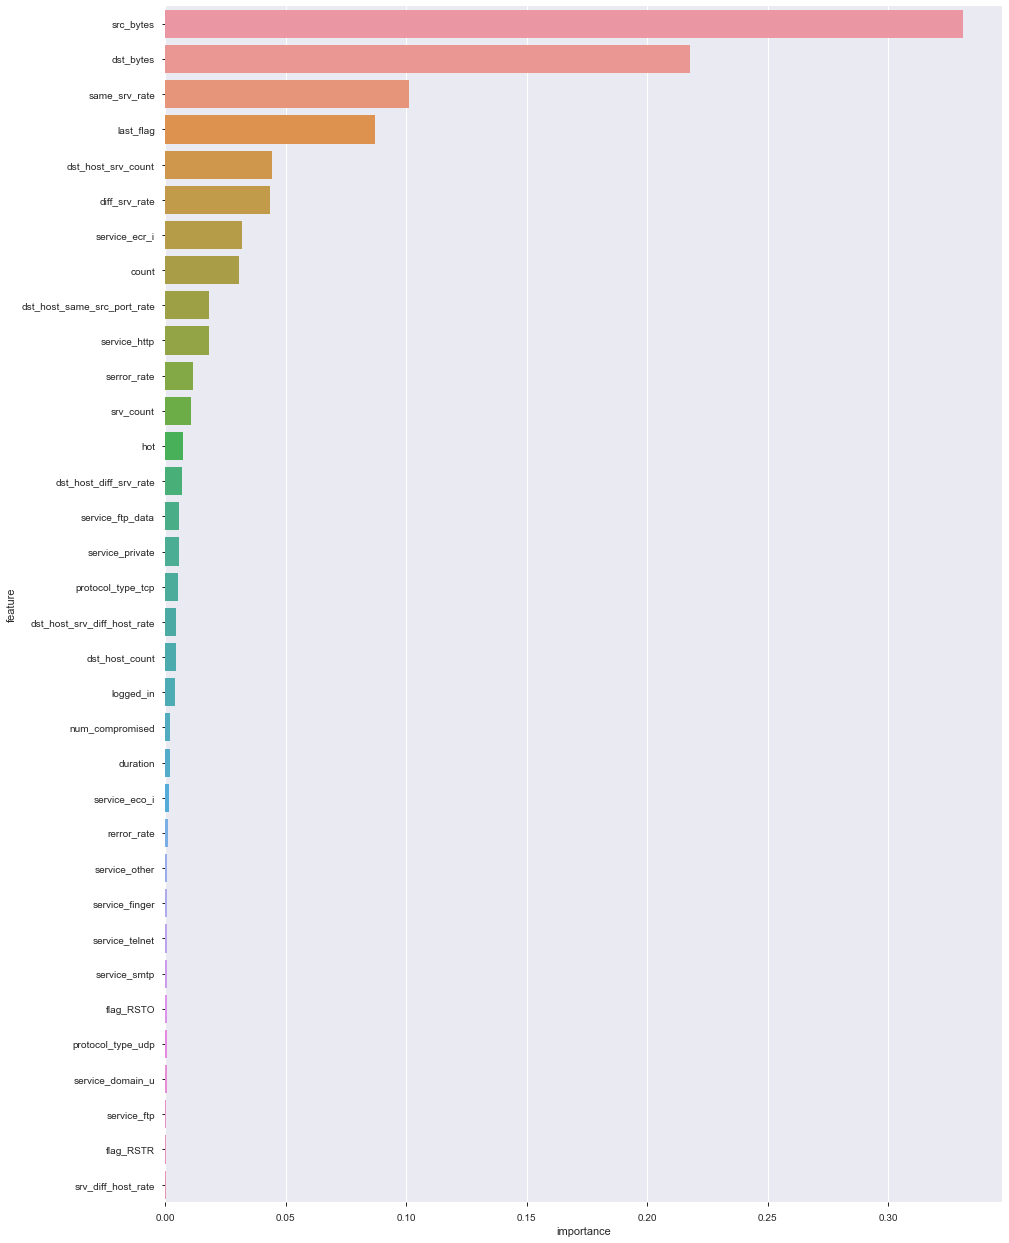

In [103]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(x_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         x_train.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank) 
plt.gcf().set_size_inches(15, 22)

In [104]:
cm = metrics.confusion_matrix( radm_test_pred.actual,
                             radm_test_pred.predicted, [1,0])
cm

array([[8997, 3836],
       [ 254, 9457]], dtype=int64)

Text(0.5, 26.0, 'Predicted label')

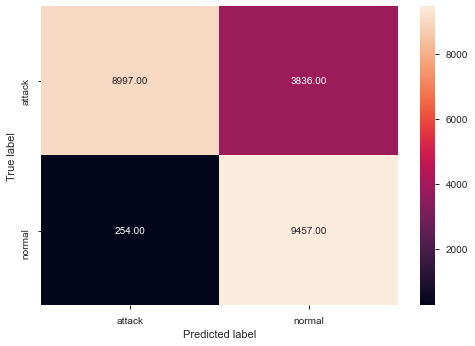

In [105]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["attack", "normal"] , yticklabels = ["attack", "normal"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [106]:
predict_proba_df = pd.DataFrame( radm_clf.predict_proba( x_test ) )
predict_proba_df.head()

0     1
0  0.00  1.00
1  0.00  1.00
2  1.00  0.00
3  0.07  0.93
4  0.77  0.23

In [107]:
train_test_pred = pd.concat( [radm_test_pred, predict_proba_df], axis = 1 )
train_test_pred

actual  predicted     0     1
0           1          1  0.00  1.00
1           1          1  0.00  1.00
2           0          0  1.00  0.00
3           1          1  0.07  0.93
4           1          0  0.77  0.23
...       ...        ...   ...   ...
22539       0          0  1.00  0.00
22540       0          0  1.00  0.00
22541       1          1  0.00  1.00
22542       0          0  1.00  0.00
22543       1          1  0.18  0.82

[22544 rows x 4 columns]

In [108]:
train_test_pred.columns = [ 'actual', 'predicted', 'normal', 'attack']

In [109]:
auc_score = metrics.roc_auc_score( train_test_pred.actual, train_test_pred.attack )
round( float( auc_score ), 2 )

0.98

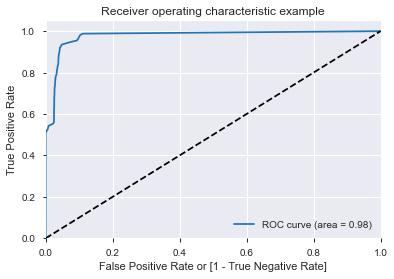

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( train_test_pred.actual,
                                     train_test_pred.attack,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [111]:
print(thresholds[0:10])
print(fpr[0:10])
print(tpr[0:10])

[2.   1.   0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92]
[0.         0.         0.00020595 0.00123571 0.00288333 0.00350118
 0.00422202 0.00566368 0.00700237 0.00762022]
[0.         0.49614276 0.50861061 0.51507831 0.51749396 0.52045508
 0.52263695 0.5250526  0.53261124 0.53658537]


In [112]:
tpr[np.abs(tpr - 0.9).argmin()]

0.898464895192083

In [113]:
cutoff_prob = thresholds[(np.abs(tpr - 0.9)).argmin()]
round( float( cutoff_prob ), 2 )

0.16

In [114]:
train_test_pred['new_labels'] = train_test_pred['attack'].map( lambda x: 1 if x >= 0.16 else 0 )

In [116]:
metrics.accuracy_score( train_test_pred.actual, train_test_pred['new_labels'])

0.9246362668559261

In [117]:
train_test_pred[0:10]

actual  predicted  normal  attack  new_labels
0       1          1    0.00    1.00           1
1       1          1    0.00    1.00           1
2       0          0    1.00    0.00           0
3       1          1    0.07    0.93           1
4       1          0    0.77    0.23           1
5       0          0    1.00    0.00           0
6       0          0    1.00    0.00           0
7       1          0    0.84    0.16           1
8       0          0    1.00    0.00           0
9       1          1    0.34    0.66           1

In [119]:

cm = metrics.confusion_matrix( train_test_pred.actual,
                          train_test_pred.new_labels>0.2, [1,0] )
cm

array([[11530,  1303],
       [  396,  9315]], dtype=int64)

Text(0.5, 26.0, 'Predicted label')

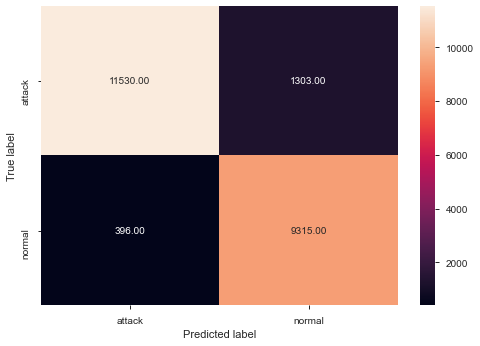

In [120]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["attack", "normal"] , yticklabels = ["attack", "normal"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Gradient Boosting

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

In [122]:
pargrid_gbm = {'n_estimators': [350,400,450,500],
               'learning_rate': [10 ** x for x in range(-3, 1)],
                'max_features': [12,15,18,20]}

In [123]:
gscv_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=pargrid_gbm, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [124]:
gscv_gbm.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 76.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [125]:
gscv_gbm.best_params_

{'learning_rate': 0.1, 'max_features': 12, 'n_estimators': 450}

In [126]:
gscv_gbm.best_score_

0.9994205130127106

In [127]:
gbm = gscv_gbm.best_estimator_

In [128]:
gbm.fit(x_train, y_train )

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=12, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=450,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [129]:
print(metrics.accuracy_score(y_train,gbm.predict(x_train)))
print(metrics.accuracy_score(y_test,gbm.predict(x_test)))

0.9998015447754678
0.8203069552874379


In [130]:
print(metrics.roc_auc_score(y_test,gbm.predict(x_test)))

0.838795250373927


In [131]:
gbm_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': gbm.predict( x_test ) } )
gbm_test_pred

actual  predicted
0           1          1
1           1          1
2           0          0
3           1          1
4           1          0
...       ...        ...
22539       0          0
22540       0          0
22541       1          1
22542       0          0
22543       1          1

[22544 rows x 2 columns]

In [132]:
gbm_cm = metrics.confusion_matrix( gbm_test_pred.actual,
                             gbm_test_pred.predicted, [1,0])
gbm_cm

array([[9051, 3782],
       [ 269, 9442]], dtype=int64)

Text(0.5, 26.0, 'Predicted label')

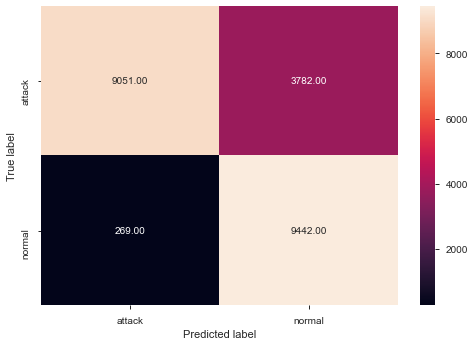

In [133]:
sns.heatmap(gbm_cm, annot=True,  fmt='.2f', xticklabels = ["attack", "normal"] , yticklabels = ["attack", "normal"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [134]:
gbm_proba_df = pd.DataFrame( gbm.predict_proba( x_test ) )
gbm_proba_df.head()

0         1
0  0.000048  0.999952
1  0.000046  0.999954
2  0.999938  0.000062
3  0.000536  0.999464
4  0.971369  0.028631

In [135]:
gbm_test_pred = pd.concat( [gbm_test_pred, gbm_proba_df], axis = 1 )
gbm_test_pred

actual  predicted         0         1
0           1          1  0.000048  0.999952
1           1          1  0.000046  0.999954
2           0          0  0.999938  0.000062
3           1          1  0.000536  0.999464
4           1          0  0.971369  0.028631
...       ...        ...       ...       ...
22539       0          0  0.999977  0.000023
22540       0          0  0.999977  0.000023
22541       1          1  0.001514  0.998486
22542       0          0  0.999934  0.000066
22543       1          1  0.036887  0.963113

[22544 rows x 4 columns]

In [136]:
gbm_test_pred.columns = [ 'actual', 'predicted', 'normal', 'attack']

In [137]:
gbm_auc_score = metrics.roc_auc_score( gbm_test_pred.actual, gbm_test_pred.attack )
round( float( gbm_auc_score ), 2 )

0.95

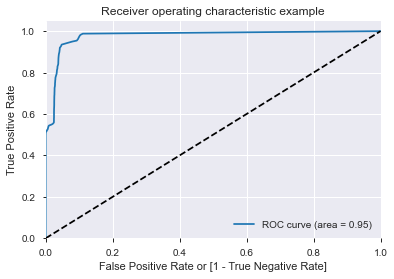

In [138]:
gbm_fpr, gbm_tpr, gbm_thresholds = metrics.roc_curve( gbm_test_pred.actual,
                                     gbm_test_pred.attack,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % gbm_auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [139]:
print(gbm_thresholds[0:10])
print(gbm_fpr[0:10])
print(gbm_tpr[0:10])

[1.99999898 0.99999898 0.99999886 0.99999855 0.99999844 0.99999842
 0.99999841 0.99999836 0.99999835 0.99999828]
[0.         0.00010298 0.00020595 0.00020595 0.00020595 0.00020595
 0.00030893 0.00030893 0.00030893 0.00030893]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 7.79241019e-05
 1.83121640e-02 2.58708018e-02 2.58708018e-02 2.79747526e-02
 2.85202213e-02 2.85981454e-02]


In [140]:
gbm_tpr[np.abs(gbm_tpr - 0.9).argmin()]

0.9000233772305775

In [141]:
cutoff_probs = gbm_thresholds[(np.abs(gbm_tpr - 0.9)).argmin()]
round( float( cutoff_probs ), 2 )

0.01

In [143]:
gbm_test_pred['new_labels'] = gbm_test_pred['attack'].map( lambda x: 1 if x >= 0.01 else 0 )

In [144]:
metrics.accuracy_score( gbm_test_pred.actual, gbm_test_pred['new_labels'])

0.9013484740951029

In [145]:
gbm_test_pred[0:10]

actual  predicted    normal    attack  new_labels
0       1          1  0.000048  0.999952           1
1       1          1  0.000046  0.999954           1
2       0          0  0.999938  0.000062           0
3       1          1  0.000536  0.999464           1
4       1          0  0.971369  0.028631           1
5       0          0  0.999962  0.000038           0
6       0          0  0.999896  0.000104           0
7       1          0  0.999217  0.000783           0
8       0          0  0.999955  0.000045           0
9       1          0  0.609595  0.390405           1

In [146]:
gbm_cm = metrics.confusion_matrix( gbm_test_pred.actual,
                          gbm_test_pred.new_labels>0.2, [1,0] )
gbm_cm

array([[11464,  1369],
       [  855,  8856]], dtype=int64)

Text(0.5, 26.0, 'Predicted label')

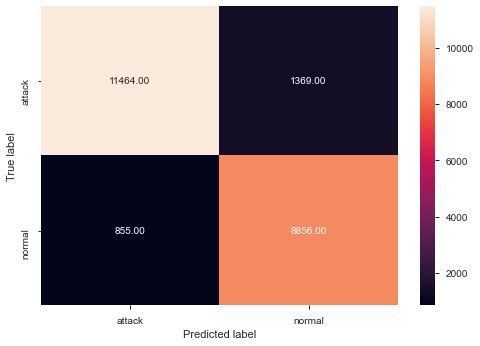

In [147]:
sns.heatmap(gbm_cm, annot=True,  fmt='.2f', xticklabels = ["attack", "normal"] , yticklabels = ["attack", "normal"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')